# Backhand computations for the shoe cover mechanism
## 1 : Computations for the tarp-like mechanism

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
plt.style.use("default")
plt.rcParams['font.size'] = 13
plt.rcParams['axes.linewidth'] = 1.5

(Text(0.5, 0, '$\\alpha$'),
 Text(0, 0.5, 'Force [N]'),
 None,
 <matplotlib.legend.Legend at 0x1d924383310>)

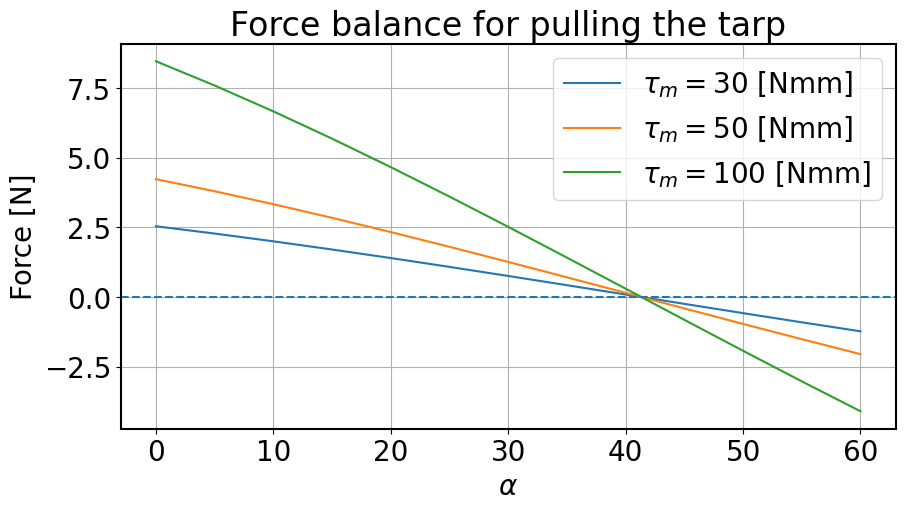

In [64]:
beta = 10
alpha = np.arange(0,65,5)
mu = .4 # Friction coefficient

# Forces
N = lambda alpha, beta, F_motor: F_motor*np.cos(np.deg2rad(90-alpha-beta)) # Normal force
Tau = lambda alpha, beta, F_motor: F_motor*np.sin(np.deg2rad(90-alpha-beta)) # Tangential force 
Ff = lambda mu, N: -mu*N # Frictional force

Tau_m = np.array([30,50,100]) # [Nmm]
R = 10 # [mm]

# Force balance
balance04 = np.empty(shape=[len(Tau_m),len(alpha)])
for i in range(len(Tau_m)):
    balance04[i,:] = Tau(alpha,beta,Tau_m[i]/R) + Ff(.8,N(alpha,beta,Tau_m[i]/R))

plt.rcParams['font.size'] = 20
plt.figure(figsize=[10,5]), plt.title('Force balance for pulling the tarp')
for i in range(len(Tau_m)):
    plt.plot(alpha,balance04[i,:], label=r'$\tau_m = $'+str(Tau_m[i])+' [Nmm]')
plt.xlabel(r'$\alpha$'), plt.axhline(linestyle='dashed'), plt.ylabel('Force [N]'), plt.grid(), plt.legend()

In [39]:
S = 280*70
rho = 220*1e-6
m = S*rho*1e-3
print(m,' [kg]')

mu = .8
Ff = mu*9.81*m
print(Ff,' [N]')

R_m = 10
Tau_m = Ff*R_m
print(Tau_m,' [Nmm]')

0.004312  [kg]
0.033840576000000004  [N]
0.33840576000000006  [Nmm]


(Text(0.5, 0, '$\\tau_m \\ [Nmm]$'),
 Text(0, 0.5, 'Force [N]'),
 None,
 <matplotlib.legend.Legend at 0x2591e0f2f70>)

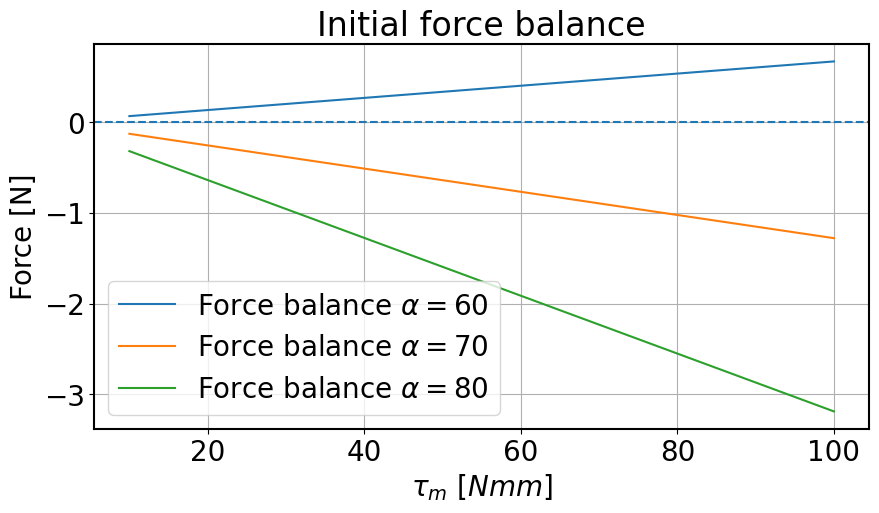

In [46]:
# Motor torque
Tau_m = np.array([10,30,50,70,100]) # [Nmm]
R = 10 # [mm]
F_m = Tau_m*R
alpha = np.array([60,70,80]) # [degrees]

# Forces
N = lambda alpha, F_motor: F_motor*np.sin(np.deg2rad(alpha)) # Normal force
Tau = lambda alpha, F_motor: F_motor*np.cos(np.deg2rad(alpha)) # Tangential force 
Ff = lambda mu, N: -mu*N # Frictional force

# Force balance
balance08 = np.empty(shape=[len(alpha),len(Tau_m)])
for i in range(len(alpha)):
    balance08[i,:] = Tau(alpha[i],Tau_m/R) + Ff(.5,N(alpha[i],Tau_m/R))

plt.rcParams['font.size'] = 20
plt.figure(figsize=[10,5]), plt.title('Initial force balance')
for i in range(len(alpha)):
    plt.plot(Tau_m,balance08[i,:], label=r'Force balance $\alpha = $'+str(alpha[i]))
plt.xlabel(r'$\tau_m \ [Nmm]$'), plt.axhline(linestyle='dashed'), plt.ylabel('Force [N]'), plt.grid(), plt.legend()

## Pulley-belt computations

### Tension need within the belt to ensure sufficient power transmission and belt max elongation

(None, <matplotlib.legend.Legend at 0x1d924143970>)

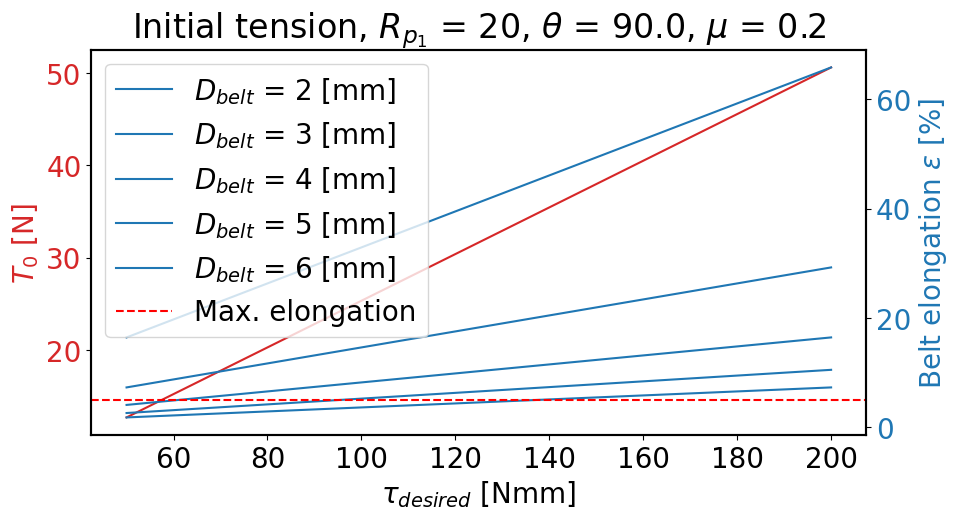

In [69]:
# Belt tension ################################
mu = .2 # Wet friction coefficient between polyurethane and steel (belt and pulley materials)
Rp1 = 20
tau_desired = np.array([50,80,100,130,150,200]) # [Nmm], motor torque
theta = np.deg2rad(90) # Enrolling angle around the pulley

Tension = lambda Rp1, mu, theta, tau: tau/(Rp1*(np.exp(mu*theta)-1/np.exp(mu*theta)))

T_needed = Tension(Rp1, mu, theta, tau_desired)
    
# Initial tension v2 ###########################
T0 = lambda mu, theta, FU: (2*np.exp(mu*theta) + 1)/(2*(np.exp(mu*theta)-1))*FU

T0_m = T0(mu,theta,tau_desired/Rp1)

# Belt elongation ##############################
E = 24.5 # [N/mm2], polyurethane Young's modulus
diameter = [2,3,4,5,6]
section = np.square(diameter)*np.pi/4

epsilon = lambda E, T, section: T/(section*E) # Relative elongation
epsilon1 = np.empty(shape=[len(section),len(T_needed)])
for i in range(len(section)):
    epsilon1[i,:] = epsilon(E,T0_m,section[i])

plt.rcParams['font.size'] = 20
fig, ax1 = plt.subplots(figsize=(10,5))
ax1.set_title(r'Initial tension, $R_{p_1}$ = '+str(Rp1)+r', $\theta$ = '+str(np.rad2deg(theta))+', $\mu$ = '+str(mu))

color = 'tab:red'
ax1.set_xlabel(r'$\tau_{desired}$ [Nmm]')
ax1.set_ylabel(r'$T_0$ [N]', color=color)
ax1.plot(tau_desired, T0_m, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel(r'Belt elongation $\epsilon$ [%]', color=color)  # we already handled the x-label with ax1
for i in range(len(section)):
    ax2.plot(tau_desired, 100*epsilon1[i,:], color=color, label=r'$D_{belt}$ = '+str(diameter[i])+' [mm]')
ax2.axhline(y = 5, color = 'r', linestyle = 'dashed', label='Max. elongation')
ax2.tick_params(axis='y', labelcolor=color), ax2.legend()

# plt.rcParams['font.size'] = 20
# fig, ax1 = plt.subplots(figsize=(10,5))
# ax1.set_title(r'Tension needed in the belt, $R_{p_1}$ = '+str(Rp1)+r', $\theta$ = '+str(np.rad2deg(theta))+', $\mu$ = '+str(mu))

# color = 'tab:red'
# ax1.set_xlabel(r'$\tau_{desired}$ [Nmm]')
# ax1.set_ylabel('Tension needed [N]', color=color)
# ax1.plot(tau_desired, T_needed, color=color)
# ax1.tick_params(axis='y', labelcolor=color)

# ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

# color = 'tab:blue'
# ax2.set_ylabel(r'Belt elongation $\epsilon$ [%]', color=color)  # we already handled the x-label with ax1
# for i in range(len(section)):
#     ax2.plot(tau_desired, 100*epsilon1[i,:], color=color, label=r'$D_{belt}$ = '+str(diameter[i])+' [mm]')
# ax2.axhline(y = 5, color = 'r', linestyle = 'dashed', label='Max. elongation')
# ax2.tick_params(axis='y', labelcolor=color), ax2.legend()

### Useful force for pulling the tarp considering ring friction

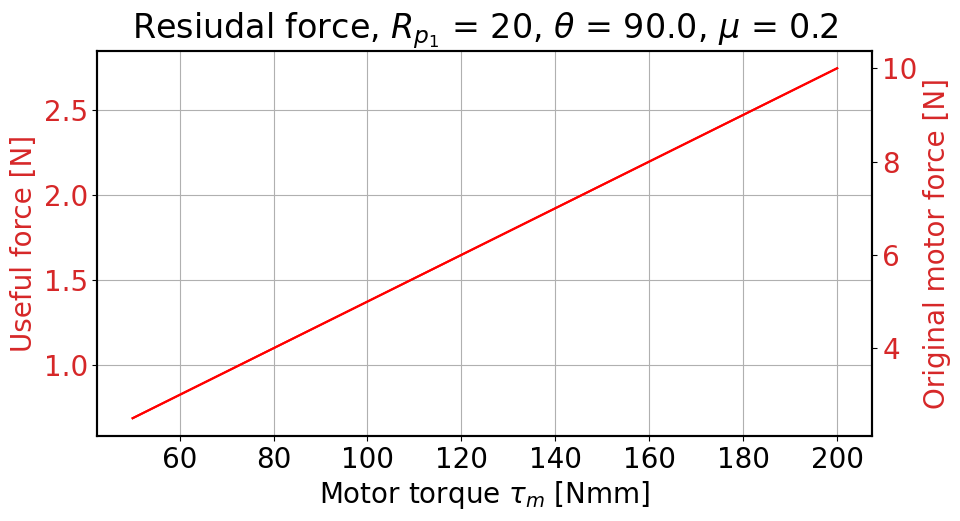

In [63]:
# For a pre-tension force T, inital friction existing in the ring
Ff0 = lambda T, beta: -mu*T*np.sin(np.deg2rad(beta))
# Firction force as a fct. of load
Fff = lambda tau, beta: -mu*tau/Rp1*np.sin(np.deg2rad(beta))
tau = np.array([50,70,100,130,150,200]) # [Nmm], motor torque
beta = 45 # [°], angle change on steel ring
n = 2 # Number of rings with change in angle
F_res = lambda beta, tau, Rp1, n: tau/Rp1 + n*(Ff0(Tension(Rp1, mu, theta, tau),beta) + Fff(tau,beta))

F_tarp = F_res(beta,tau,Rp1,n)

plt.rcParams['font.size'] = 20
color = 'tab:red'
fig, ax1 = plt.subplots(figsize=(10,5))
ax1.set_title(r'Resiudal force, $R_{p_1}$ = '+str(Rp1)+r', $\theta$ = '+str(np.rad2deg(theta))+', $\mu$ = '+str(mu))
ax1.plot(tau,F_tarp,color='r')
ax1.set_xlabel(r'Motor torque $\tau_m$ [Nmm]'), ax1.set_ylabel('Useful force [N]',color=color)
ax1.tick_params(axis='y', labelcolor=color),plt.grid()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Original motor force [N]', color=color)  # we already handled the x-label with ax1
ax2.plot(tau,tau/Rp1,color='r')
ax2.tick_params(axis='y', labelcolor=color)